# Analisis Sentimen Tingkat Kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Twitter Dengan Metode Support Vector Machine, Naive Bayes, dan KNN

Nama : Farhan Rahman 

Kelas : Insight 

<b>Import Dataset</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import seaborn as sns
%matplotlib inline 

In [2]:
#import nltk 
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 01 Data Acquisition

- Sentimen positif = positive
- Sentimen negatif = negative


In [3]:
data = pd.read_csv('service_provider.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [4]:
data = data.drop('Id', axis = 'columns')
print(data)

    Sentiment                                         Text Tweet
0    positive  <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1    positive  Saktinya balik lagi, alhamdulillah :v <PROVIDE...
2    negative  Selamat pagi <PROVIDER_NAME>  bisa bantu kenap...
3    negative  Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4    negative            Selamat malam PENDUSTA <PROVIDER_NAME> 
..        ...                                                ...
295  positive  Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...
296  positive         Alhamdulillah lancar pakai <PROVIDER_NAME>
297  positive  Untung pakai internet <PROVIDER_NAME>, lancar,...
298  positive  di tempat ramai seperti di lokasi wisata, <PRO...
299  negative  Sinyal <PROVIDER_NAME> amsyong d stadion gajayana

[300 rows x 2 columns]


In [5]:
data.head()

,Sentiment,Text Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [6]:
data.isnull().sum()

Sentiment     0
Text Tweet    0
dtype: int64

In [7]:
data.info

<bound method DataFrame.info of     Sentiment                                         Text Tweet
0    positive  <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1    positive  Saktinya balik lagi, alhamdulillah :v <PROVIDE...
2    negative  Selamat pagi <PROVIDER_NAME>  bisa bantu kenap...
3    negative  Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4    negative            Selamat malam PENDUSTA <PROVIDER_NAME> 
..        ...                                                ...
295  positive  Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...
296  positive         Alhamdulillah lancar pakai <PROVIDER_NAME>
297  positive  Untung pakai internet <PROVIDER_NAME>, lancar,...
298  positive  di tempat ramai seperti di lokasi wisata, <PRO...
299  negative  Sinyal <PROVIDER_NAME> amsyong d stadion gajayana

[300 rows x 2 columns]>

In [8]:
# mengecek jumlah sentimen 
print(f"Jumlah total sentimen tingkat kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Twitter {data.shape[0]} data\n")
print('Terdiri dari label :')
print('Sentimen Negatif: ', data[data.Sentiment=='negative'].shape[0])
print('Sentimen Positif :', data[data.Sentiment=='positive'].shape[0])

Jumlah total sentimen tingkat kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Twitter 300 data

Terdiri dari label :
Sentimen Negatif:  161
Sentimen Positif : 139


<b>Melihat distribusi data</b>

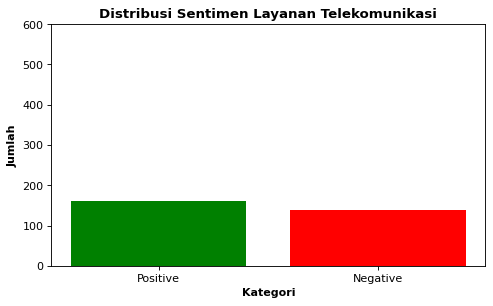

In [9]:
height = data['Sentiment'].value_counts()
labels = ('Positive','Negative')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Sentimen Layanan Telekomunikasi', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['green', 'red'])
plt.xticks(y_pos, labels)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

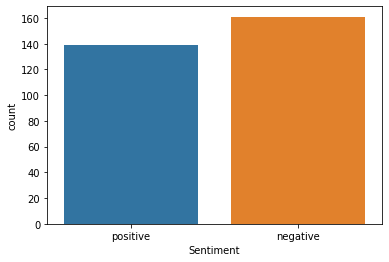

In [10]:
sns.countplot(data['Sentiment'])

# 02 Text Preprocessing

### Case Folding 

Tujuan dalam melakukan case folding adalah untuk memformat semua text menjadi lower case. selain itu, untuk menghapus beberapa format yang tidak dibutuhkan seperti URL, angka, dan tanda baca

In [11]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [12]:
data

,Sentiment,Text Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...
295,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


In [13]:
# melakukan pengecekan terhadap hasil case folding 
sampel_kalimat = data['Text Tweet'].iloc[10]
case_folding = casefolding(sampel_kalimat)

print('Sampel kalimat sebelum case folding\n:', sampel_kalimat)
print('Hasil Case Folding :\n', case_folding)

Sampel kalimat sebelum case folding
: <PROVIDER_NAME> mampus!!!!! bulan puasa, subuh2 mau sahur cek pulsa tersedot terus. dan sekarang sisa 30 ribu <PROVIDER_NAME> Tolong dibaca!!!
Hasil Case Folding :
 provider_name mampus bulan puasa subuh mau sahur cek pulsa tersedot terus dan sekarang sisa  ribu provider_name tolong dibaca


### Slang Word Normalization

In [14]:
# masih menggunakan dataset sms 
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [15]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

### Filtering ( Stopword Removal )


In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_indonesia = stopwords.words('indonesian')

In [17]:
print('Banyaknya kata dalam stopword bahasa indonesia :',len(stopwords_indonesia), 'kata')
print('preview kata dalam stopwords bahasa indonesia ;')
stopwords_indonesia[:20]

Banyaknya kata dalam stopword bahasa indonesia : 758 kata
preview kata dalam stopwords bahasa indonesia ;


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

<b> Stopword Removal </b>


In [18]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['di','dan','sisa','dear','selamat','malam','dari','nya','rt','hrs','yang','dengan','apa','pula']   # Tambahkan kata lain dalam daftar stopword

stopwords_indonesia = stopwords_indonesia + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_indonesia:
          clean_words.append(word)
  return ' '.join(clean_words)

In [19]:
raw_sample = data['Text Tweet'].iloc[122]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  dibuang sayang karena terlalu setia, lagipula nomernya bagus  <PROVIDER_NAME> <PROVIDER_NAME> <URL> 
Case folding		:  dibuang sayang karena terlalu setia lagipula nomernya bagus  provider_name provider_name url
Stopword removal	:  dibuang sayang setia lagipula nomernya bagus provider_name provider_name url


### Stemming
Proses mengubah suatu kata menjadi bentuk kata dasarnya

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk langkah stemming Bahasa Indonesia 
def stemming(text):
    text = stemmer.stem(text)
    return text

In [21]:
raw_sample = data['Text Tweet'].iloc[10]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data \t:', raw_sample)
print('Case folding\t:', case_folding)
print('Stopword removal \t:', stopword_removal)
print('stemming \t:', text_stemming)

Raw data 	: <PROVIDER_NAME> mampus!!!!! bulan puasa, subuh2 mau sahur cek pulsa tersedot terus. dan sekarang sisa 30 ribu <PROVIDER_NAME> Tolong dibaca!!!
Case folding	: provider_name mampus bulan puasa subuh mau sahur cek pulsa tersedot terus dan sekarang sisa  ribu provider_name tolong dibaca
Stopword removal 	: provider_name mampus puasa subuh sahur cek pulsa tersedot ribu provider_name tolong dibaca
stemming 	: provider name mampus puasa subuh sahur cek pulsa sedot ribu provider name tolong baca


### Text Preprocessing Pipeline 

In [22]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [23]:
%%time
data['teks_bersih'] = data['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: total: 1min 14s
Wall time: 1min 16s


In [24]:
data

,Sentiment,Text Tweet,teks_bersih
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,user mention boikot provider name produk bangs...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v provider name
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,pagi provider name bantu kamar sinyal hilang p...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,provider name jaring data lot banget h
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,dusta provider name
...,...,...,...
295,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal provider name lancar...
296,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai provider name
297,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet provider name lancar ide
298,positive,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata provider name jaya


# 03 Feature Engineering

In [25]:
# Memisahkan kolom fitur dengan kolom target (klasifikasi)

x = data['teks_bersih']
y = data['Sentiment']

In [26]:
x

0      user mention boikot provider name produk bangs...
1                    sakti alhamdulillah v provider name
2      pagi provider name bantu kamar sinyal hilang p...
3                 provider name jaring data lot banget h
4                                    dusta provider name
                             ...                        
295    pantesan lancar ya sinyal provider name lancar...
296             alhamdulillah lancar pakai provider name
297       untung pakai internet provider name lancar ide
298               ramai lokasi wisata provider name jaya
299      sinyal provider name amsyong d stadion gajayana
Name: teks_bersih, Length: 300, dtype: object

In [27]:
y

0      positive
1      positive
2      negative
3      negative
4      negative
         ...   
295    positive
296    positive
297    positive
298    positive
299    negative
Name: Sentiment, Length: 300, dtype: object

### Feature Extraction - Bag of Words dan N-Gram

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer

sklearn.feature_extraction.text.CountVectorizer

In [34]:
# Bow dengan Unigram 
bow = CountVectorizer(ngram_range = (1,1))
bow.fit(x)

CountVectorizer()

In [35]:
# melihat jumlah fitur / kata
print(len(bow.get_feature_names_out()))

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

In [36]:
# melihat fitur apa saja yang ada di dalam korpus
print(bow.get_feature_names_out())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

In [ ]:
# melihat matriks tiap token 
x_bow = bow.transform(x).toarray()
x_bow

In [ ]:
data_bow = pd.DataFrame(x_bow, columns=bow.get_feature_names_out())
data_bow

In [ ]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(x_bow, output)

### Feature Extraction (TF-IDF dan N-Gram)
proses mengubah teks menjadi vektor menggunakan metode TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [39]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names()))

684


In [40]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names())

['acara', 'aceh', 'adhan', 'ajaib', 'ajar', 'akses', 'aksi', 'aktif', 'aktivitas', 'alat', 'alhamdulillah', 'allah', 'aman', 'ampun', 'amsyong', 'an', 'anak', 'and', 'andal', 'anjing', 'anjir', 'antek', 'apa', 'app', 'arae', 'area', 'arit', 'artikel', 'asa', 'asik', 'astaga', 'asyik', 'ayo', 'baca', 'badai', 'bagi', 'bagiberkah', 'bagus', 'bahan', 'baik', 'bain', 'bajak', 'baju', 'bandung', 'banget', 'bangsa', 'bangsat', 'bangsatprovider', 'bangunjiwo', 'bantu', 'bantul', 'baper', 'bareng', 'batas', 'baterai', 'bayar', 'bbm', 'beda', 'bekas', 'bela', 'belah', 'belanja', 'beli', 'benci', 'benerin', 'bentuk', 'berbagiberkah', 'beres', 'berhatihati', 'berita', 'berkah', 'berkat', 'besar', 'betah', 'biar', 'bijak', 'bikin', 'bilang', 'bilboard', 'biru', 'bisnis', 'bogor', 'boikot', 'boikotprovider', 'bonus', 'browsing', 'brsatu', 'buang', 'buangjgn', 'buka', 'bukber', 'bukti', 'bulan', 'bunyi', 'buru', 'buruk', 'busuk', 'cacat', 'camat', 'canggih', 'cantik', 'capture', 'cari', 'cek', 'ceo'

In [41]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(x).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names())
data_tf_idf

,acara,aceh,adhan,ajaib,ajar,akses,aksi,aktif,aktivitas,alat,...,xd,ya,yaa,yah,yess,youtube,youtubenya,youtubeyondergenflix,yuk,zalim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.28847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

### Feature Selection

In [45]:
# mengubah nilai data tabular tf-idf menjadi array agar dapat menjalankan feature selection
x = np.array(data_tf_idf)
y = np.array(y)

<b> Feature Selection berdasarkan nilai k terbesar </b>

Sources :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

<b>Menghitung nilai chi-square antara setiap nilai fitur non negatif dan kelas</b>

Sources :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html



In [46]:
# Import library SelectKBest dari modul sklearn feature selection
from sklearn.feature_selection import SelectKBest

# Import Library chi2 dari modul sklearn feature selection
from sklearn.feature_selection import chi2

In [47]:
# 10 fitur dengan nilai statistik chi-square tertinggi
chi2_features = SelectKBest(chi2, k=100)
x_fitur_terbaik = chi2_features.fit_transform(x,y)

In [48]:
# Reduksi Fitur
print('Jumlah Fitur Asli : ', x.shape[0])
print('Jumlah Fitur yang dikurangi :', x_fitur_terbaik.shape[1])

Jumlah Fitur Asli :  300
Jumlah Fitur yang dikurangi : 100


<b> Melihat chi2_features.scores</b>
- Semakin tinggi nilainya, makin baik fiturnya

In [49]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns = ['nilai'])
data_chi2

,nilai
0,0.321048
1,0.400585
2,0.397975
3,0.024103
4,0.061443
...,...
679,3.380404
680,0.290353
681,0.402324
682,0.674950


In [51]:
# Menampilkan kata (fitur) beserta nilainya
fitur = tf_idf.get_feature_names()

data_chi2['fitur'] = fitur

data_chi2

,nilai,fitur
0,0.321048,acara
1,0.400585,aceh
2,0.397975,adhan
3,0.024103,ajaib
4,0.061443,ajar
...,...,...
679,3.380404,youtube
680,0.290353,youtubenya
681,0.402324,youtubeyondergenflix
682,0.674950,yuk


In [52]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
326,6.761727,lancar
185,6.647455,gratis
614,5.475393,terimakasih
10,4.284721,alhamdulillah
366,4.253111,mantap
...,...,...
576,0.002229,stabil
333,0.001347,layan
372,0.000897,masuk
89,0.000372,buka


In [53]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,

Menampilkan fitur-fitur yang terpilih berdasarkan mask atau nilai tertinggi yang sudah di kalkulasi pada chi-square

In [54]:
fitur_baru = []

for bool, f in zip(mask,fitur):
    if bool:
        fitur_baru.append(f)
    fitur_terpilih = fitur_baru


fitur_terpilih

['alhamdulillah',
 'allah',
 'anak',
 'asik',
 'bagi',
 'bagus',
 'bangsat',
 'bayar',
 'beli',
 'beres',
 'berkah',
 'boikotprovider',
 'bonus',
 'buang',
 'buru',
 'buruk',
 'cari',
 'coba',
 'daerah',
 'data',
 'dibayarin',
 'dihack',
 'edge',
 'eleven',
 'faedah',
 'ganggu',
 'gb',
 'glte',
 'gratis',
 'habis',
 'hancur',
 'harga',
 'hasil',
 'hemat',
 'hilang',
 'hore',
 'irit',
 'jam',
 'jaring',
 'jelek',
 'jumat',
 'kasih',
 'kencang',
 'keren',
 'komplain',
 'lambat',
 'lancar',
 'lelet',
 'lot',
 'lumayan',
 'mahal',
 'mantap',
 'menang',
 'mending',
 'mohon',
 'mudah',
 'mulu',
 'murah',
 'namecare',
 'namepoin',
 'nih',
 'nomor',
 'nonton',
 'orang',
 'parah',
 'payah',
 'pekerjaaan',
 'php',
 'pindah',
 'poin',
 'product',
 'pulsa',
 'riah',
 'rugi',
 'ruh',
 'sakti',
 'sedih',
 'selesai',
 'senang',
 'serta',
 'setia',
 'sevel',
 'si',
 'sih',
 'suara',
 'sumba',
 'tai',
 'teman',
 'terima',
 'terimakasih',
 'tinggal',
 'tolong',
 'tukar',
 'untung',
 'upgrade',
 'upload'

<b>Melihat vocab yang dihasilkan oleh TF-IDF</b>

In [55]:
fitur_k_terbaik = {} # dictionary kosong 

#Iterasi untuk mengulangi vocab yang dihasilkan TF-IDF
for (k,v) in tf_idf.vocabulary_.items():
    
#cek apakah fitur termasuk k fitur yang terseleksi 
    if k in fitur_terpilih:

# Jika iya,simpan fitur tersebt pada dictionary kosong
        fitur_k_terbaik[k] = v
    

In [56]:
fitur_k_terbaik 
# cek hasil vocab dihasilkan dari TF-IDF setiap nilai k tersleksi

{'sakti': 527,
 'alhamdulillah': 10,
 'hilang': 210,
 'jaring': 251,
 'data': 125,
 'lot': 347,
 'product': 493,
 'ganggu': 169,
 'gratis': 185,
 'youtube': 679,
 'senang': 545,
 'boikotprovider': 83,
 'pulsa': 504,
 'tolong': 628,
 'coba': 112,
 'parah': 472,
 'jam': 243,
 'nih': 432,
 'lambat': 325,
 'bagus': 37,
 'jelek': 255,
 'mahal': 354,
 'tai': 593,
 'sumba': 585,
 'bayar': 55,
 'habis': 190,
 'tinggal': 623,
 'hore': 216,
 'rugi': 521,
 'bagi': 35,
 'berkah': 70,
 'video': 662,
 'anak': 16,
 'daerah': 120,
 'namecare': 415,
 'irit': 234,
 'sih': 555,
 'hancur': 195,
 'setia': 550,
 'orang': 458,
 'komplain': 303,
 'php': 481,
 'asik': 29,
 'kencang': 289,
 'beli': 62,
 'edge': 145,
 'murah': 408,
 'wilayah': 670,
 'terimakasih': 614,
 'menang': 383,
 'nomor': 437,
 'buang': 87,
 'mantap': 366,
 'serta': 547,
 'teman': 610,
 'harga': 199,
 'lelet': 336,
 'gb': 172,
 'pindah': 483,
 'si': 553,
 'glte': 179,
 'lancar': 326,
 'nonton': 438,
 'dibayarin': 132,
 'poin': 486,
 'namep

<b>Menampilkan fitur-fitur yang sudah diseleksi beserta nilai vektornya pada data keseluruhan untuk dijalankan pada proses Machine Learning</b>

Hanya nilai k fitur terpilih sesuai parameter k yang ditentukan sebelumnya

In [57]:
data_fitur_terpilih = pd.DataFrame(x_fitur_terbaik, columns = fitur_terpilih)
data_fitur_terpilih

,alhamdulillah,allah,anak,asik,bagi,bagus,bangsat,bayar,beli,beres,...,tinggal,tolong,tukar,untung,upgrade,upload,video,weekend,wilayah,youtube
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.530908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
296,0.628600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
297,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.512593,0.0,0.0,0.0,0.0,0.0,0.0
298,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
with open('kbest_feature', 'wb') as output:
  pickle.dump(fitur_k_terbaik, output)

# 04 Machine Learning Modelling 

### Model Pertama : Algoritma Naive Bayes

Source : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Pengklasifikasi Naive Bayes multinomial cocok untuk klasifikasi dengan fitur diskrit (misalnya, jumlah kata untuk klasifikasi teks). Distribusi multinomial biasanya membutuhkan jumlah fitur integer. Namun, dalam praktiknya, penghitungan pecahan seperti tf-idf juga dapat berfungsi.

In [59]:
# Import Multinomial dari Algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#Import train_test_split untuk memisahkan data training dan data testing
from sklearn.model_selection import train_test_split

# Import dump dari joblib untuk menyimpan model yang telah dilatih
from joblib import dump

<b>Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji</b>

- Random_state digunakan untuk internal random generator
- Gunakan fitur (X) hasil seleksi fitur


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_fitur_terbaik, y, test_size = 0.2, random_state = 40)

<b>Training Model Multinomial</b>

In [61]:
algoritma1 = MultinomialNB()

# fit algoritma pada data training dan data testing
model1 = algoritma1.fit(x_train, y_train)

#Simpan model hasil training
dump(model1, filename = 'model_multinomial.joblib')

['model_multinomial.joblib']

In [62]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred1 = model1.predict(x_test)

# Tampilkan hasil prediksi label dari model
model_pred1

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive'],
      dtype='<U8')

In [63]:
# Label sebenarnya pada data testing 
y_test

array(['positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive'],
      dtype=object)

<b> Hasil pemodelan dengan Multinomial </b>


In [64]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred1 == y_test).sum()
prediksi_salah = (model_pred1 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 51
Jumlah prediksi salah	: 9
Akurasi pengujian	: 85.0 %


### Model kedua : SVM

Source : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [65]:
# Import 
from sklearn import svm

#Import train_test_split untuk memisahkan data training dan data testing
from sklearn.model_selection import train_test_split

# Import dump dari joblib untuk menyimpan model yang telah dilatih
from joblib import dump

<b>Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji</b>

- Random_state digunakan untuk internal random generator
- Gunakan fitur (X) hasil seleksi fitur


<b>Training Model Multinomial</b>

In [66]:
algoritma2 = svm.SVC()

# fit algoritma pada data training dan data testing
model2 = algoritma2.fit(x_train, y_train)

#Simpan model hasil training
dump(model2, filename = 'model_svm.joblib')

['model_svm.joblib']

In [67]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred2 = model2.predict(x_test)

# Tampilkan hasil prediksi label dari model
model_pred2

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive'],
      dtype=object)

In [68]:
# Label sebenarnya pada data testing 
y_test

array(['positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive'],
      dtype=object)

<b> Hasil pemodelan dengan SVC </b>

In [69]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred2 == y_test).sum()
prediksi_salah = (model_pred2 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 53
Jumlah prediksi salah	: 7
Akurasi pengujian	: 88.33333333333333 %


### Model ketiga : KNN

In [70]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

#Import train_test_split untuk memisahkan data training dan data testing
from sklearn.model_selection import train_test_split

# Import dump dari joblib untuk menyimpan model yang telah dilatih
from joblib import dump

<b>Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji</b>

- Random_state digunakan untuk internal random generator
- Gunakan fitur (X) hasil seleksi fitur


<b>Training Model K-Nearest Neighbors</b>

In [71]:
algoritma3 = KNeighborsClassifier()

# fit algoritma pada data training dan data testing
model3 = algoritma3.fit(x_train, y_train)

#Simpan model hasil training
dump(model2, filename = 'model_knn.joblib')

['model_knn.joblib']

In [72]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred3 = model3.predict(x_test)

# Tampilkan hasil prediksi label dari model
model_pred3

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive'],
      dtype=object)

<b> Hasil pemodelan dengan KNN </b>

In [73]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred3 == y_test).sum()
prediksi_salah = (model_pred3 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 46
Jumlah prediksi salah	: 14
Akurasi pengujian	: 76.66666666666667 %


# 05 Model Evaluation 

### Evaluasi Model Naive Bayes

Confusion matrix:
 [[31  0]
 [ 9 20]]
              precision    recall  f1-score   support

    negative       0.78      1.00      0.87        31
    positive       1.00      0.69      0.82        29

    accuracy                           0.85        60
   macro avg       0.89      0.84      0.84        60
weighted avg       0.88      0.85      0.85        60



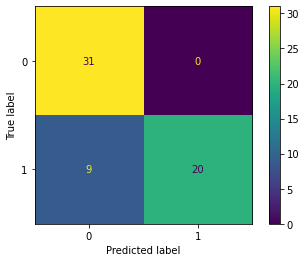

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred1)
print('Confusion matrix:\n', cm)
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_pred1)
ConfusionMatrixDisplay(cm).plot()

from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred1))

### Evaluasi Model SVM

Confusion matrix:
 [[31  0]
 [ 7 22]]
              precision    recall  f1-score   support

    negative       0.82      1.00      0.90        31
    positive       1.00      0.76      0.86        29

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60



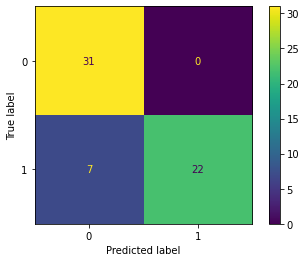

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred2)
print('Confusion matrix:\n', cm)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_pred2 )
ConfusionMatrixDisplay(cm).plot()

from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred2))

### Evaluasi Model KNN

Confusion matrix:
 [[27  4]
 [10 19]]
              precision    recall  f1-score   support

    negative       0.73      0.87      0.79        31
    positive       0.83      0.66      0.73        29

    accuracy                           0.77        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.78      0.77      0.76        60



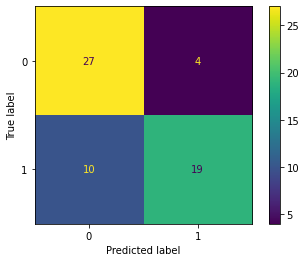

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred3)
print('Confusion matrix:\n', cm)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_pred3)
ConfusionMatrixDisplay(cm).plot()

from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred3))

# 06 Simple Deployment

In [77]:
from joblib import load

# load model
model = load('model_multinomial.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature', 'rb'))

In [78]:
#@title Masukkan Teks Anda:
#input_text = "Bisa Bayar Di Tempat. Kacang mede/mente asli Wonogiri. Stok selalu baru dan fress bukan stok lama. Sedia. Mentah utuh120rb. Matang 135rbu. Chat/wa 08229808xxxx." #@param {type:"string"}
input_text = input("Masukkan Teks: ")

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('\nHasil Text Preprocessing :', pre_input_text)

if (result=='negative'):
    s = 'negatif'
elif (result=='positive'):
    s = 'positif'
    
print('\nHasil prediksi: ', input_text, 'adalah : ',s)

Masukkan Teks: jelek bgt

Hasil Text Preprocessing : jelek banget

Hasil prediksi:  jelek bgt adalah :  negatif


# 07 Word Cloud

In [79]:
!pip install wordcloud

<b>Representasi kata-kata positif</b>


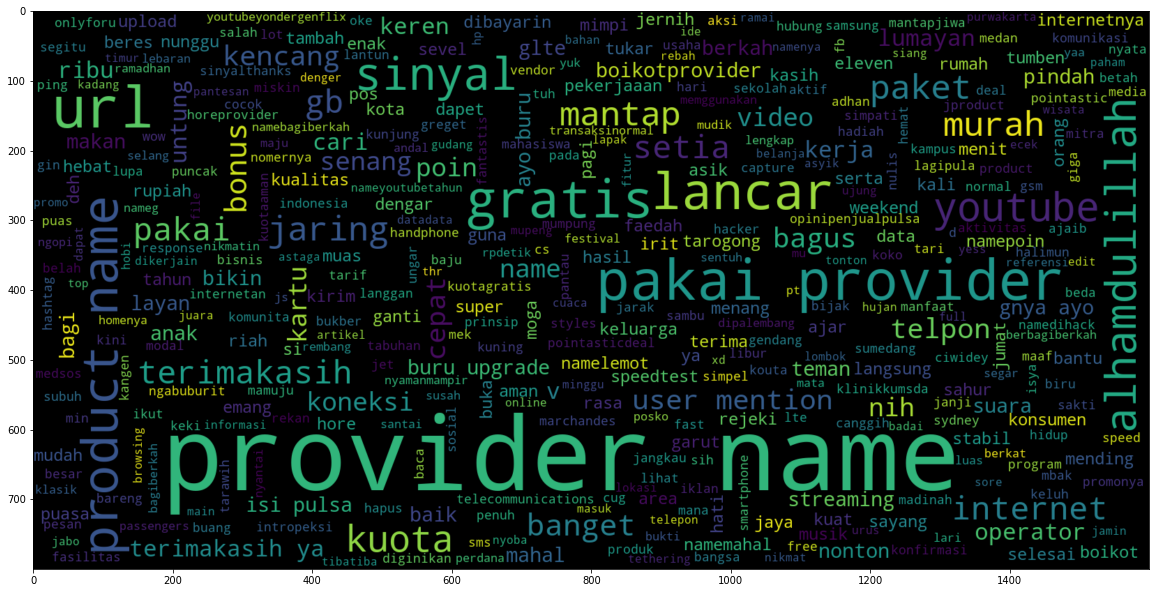

In [80]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Sentiment == 'positive'].teks_bersih))
plt.imshow(wc , interpolation = 'bilinear')

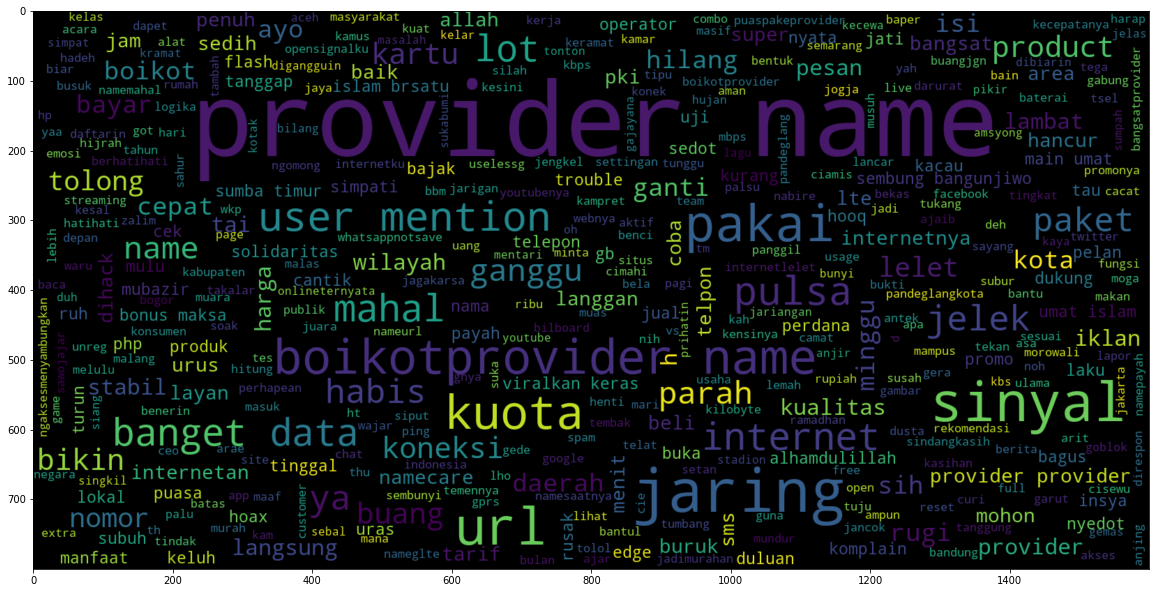

In [81]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Sentiment == 'negative'].teks_bersih))
plt.imshow(wc , interpolation = 'bilinear')